## Homework 2

#### John Stachurski

Shenzhen Winter Camp 2018

### Exercise 1

Write your own version of a one dimensional [kernel density estimator](https://en.wikipedia.org/wiki/Kernel_density_estimation), which estimates a density from a sample.

Write it as a class that takes the data $X$ and bandwidth $h$ when initialized and provides a method $f$ such that

$$
    f(x) = \frac{1}{hn} \sum_{i=1}^n 
    K \left( \frac{x-X_i}{h} \right)
$$

For $K$ use the Gaussian kernel ($K$ is the standard normal density).

Write the class so that the bandwidth defaults to Silverman's rule (see the "rule of thumb" discussion on [this page](https://en.wikipedia.org/wiki/Kernel_density_estimation)).  Test the class you have written by going through the steps

1. simulate data $X_1, \ldots, X_n$ from distribution $\phi$
2. plot the kernel density estimate over a suitable range
2. plot the density of $\phi$ on the same figure

for distributions $\phi$ of the following types


* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 2$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = 2$ and $\beta = 5$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 0.5$

Use $n=100$.

Make a comment on your results.  (Do you think this is a good estimator of these distributions?)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [71]:
class kde():
    def __init__(self,X):
        self.X =X
        self.h = ((4*np.std(self.X)**5)/(3*len(self.X)))**0.2
        
    def f(self,x):
        n = len(self.X)
        return sum(self.K((x-self.X[i])/self.h) for i in range(n))/(self.h*n)
    
    def K(self,m):
        return 1/np.sqrt(2*np.pi)*np.power(np.e,(-0.5*np.power(m,2)))        

In [72]:
def plot_beta(a,b):
    fig, ax = plt.subplots()
    m = kde(np.random.beta(a,b,size=100))
    x = np.linspace(0,1,1000)
    y1 = m.f(x)
    y2 = stats.beta.pdf(x,a,b) 
    ax.plot(x,y1,'b-',label='kde')
    ax.plot(x,y2,'r-',label='true pdf')
    ax.legend()
    ax.set_xlabel('a={0},b={1}'.format(a,b))
    plt.show()


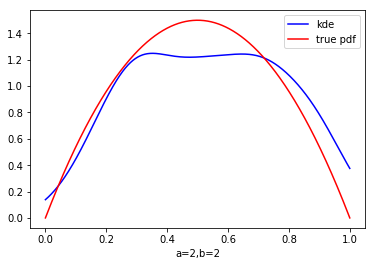

In [74]:
plot_beta(2,2)

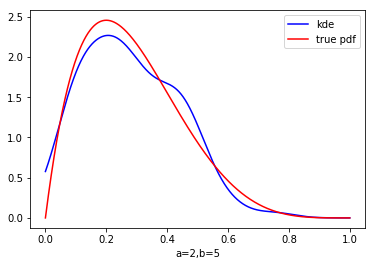

In [44]:
plot_beta(2,5)

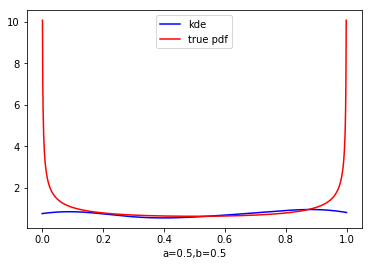

In [47]:
plot_beta(0.5,0.5)

Comment:
I think it is a good estimater if the function is convex and has more distributions in the middle, like the first two graphs.
However, if the distribution is heavy on two tails, the results are unsatisfactory, like the last graph.

### Exercise 2

In class we discussed the following fact:  For the $AR(1)$ process

$$ X_{t+1} = \rho X_t + b + \sigma \xi_{t+1} $$

with $\{ \xi_t \}$ iid and standard normal, 

$$ 
    \psi_t = N(\mu, s^2) \implies \psi_{t+1} 
    = N(\rho \mu + b, \rho^2 s^2 + \sigma^2) 
$$

Confirm this, at least approximately, by simulation.  Let

* $\rho = 0.9$
* $b = 0.0$
* $\sigma = 0.1$
* $\mu = -3$
* $s = 0.2$

First, plot $\psi_t$ and $\psi_{t+1}$ using the true distributions described above.

Second, plot $\psi_{t+1}$ on the same figure (in a different color) as follows:

1. Generate $n$ draws of $X_t$ from the $N(\mu, s^2)$ distribution
2. Update them all using the rule $X_{t+1} = \rho X_t + b + \sigma \xi_{t+1}$
3. Use the resulting sample of $X_{t+1}$ values to produce a density estimate via kernel density estimation.

Try this for several different values of $n$ and confirm that the simulation based estimate of $\psi_{t+1}$ does converge to the theoretical distribution.

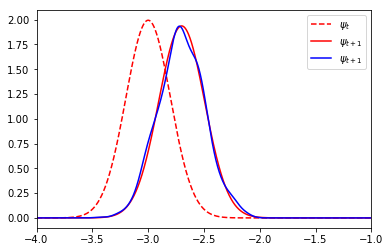

In [80]:
ρ,b,σ,μ,s = 0.9, 0, 0.1, -3, 0.2

x = np.linspace(-4,2,10000)
ψ_t = stats.norm.pdf(x,μ,s)
ψ_t1 = stats.norm.pdf(x,ρ*μ+b,np.sqrt(ρ**2*s**2+σ**2))

X_t = np.random.normal(loc=μ, scale=s, size=1000)
X_t1 = ρ*X_t + b + σ * np.random.normal(size=1000)
y = kde(X_t1)

fig, ax = plt.subplots()
ax.plot(x,ψ_t,'r--',label='$\psi_t$')
ax.plot(x,ψ_t1,'r-',label='$\psi_{t+1}$')
ax.plot(x,y.f(x),'b-',label='$\psi_{t+1}$')
ax.set_xlim(-4,-1)
ax.legend()
plt.show()

